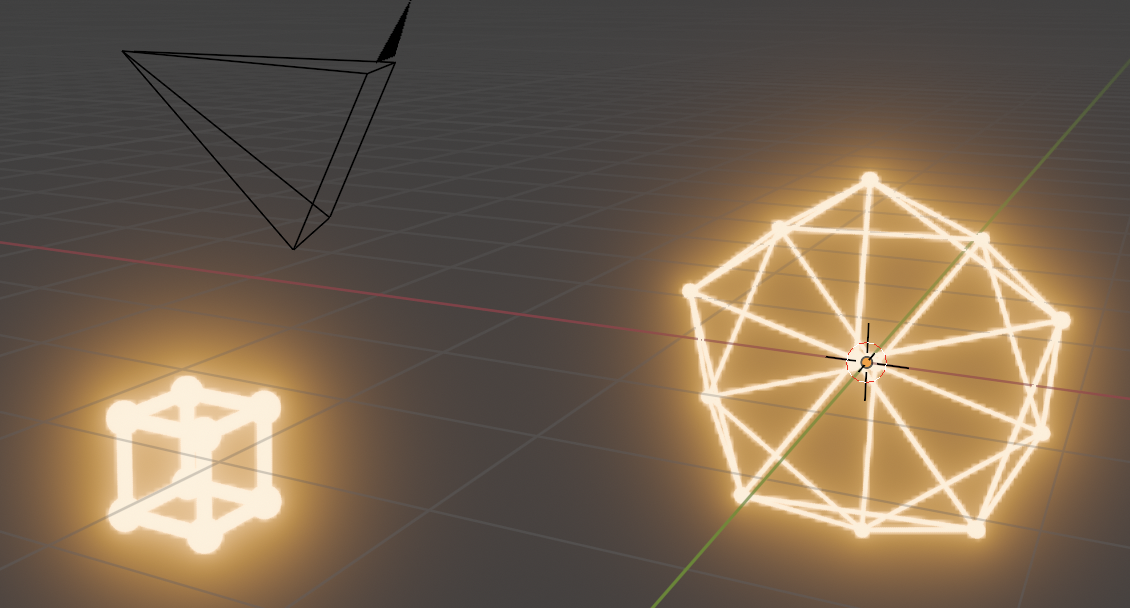

In [ ]:
import bpy
import bmesh

blend_file_path = "n3c_create_a_simple_network.blend"
bpy.ops.wm.open_mainfile(filepath=blend_file_path)

In [ ]:
import bpy
import bmesh

# Define the node positions and edges
node_positions = {
    0: [-0.81, -0.48, 0.38],
    1: [0.13, -0.97, 0.27],
    2: [0.91, -0.24, 0.40],
    3: [0.81, 0.48, -0.38],
    4: [-0.02, 0.20, -1.00],
    5: [-0.44, -0.70, -0.59],
    7: [-0.62, 0.55, 0.58],
    8: [0.01, -0.20, 1.00],
    9: [0.44, 0.70, 0.59],
    10: [-0.13, 0.97, -0.27],
    11: [-0.91, 0.24, -0.40],
    6: [0.63, -0.55, -0.59],
}

edges = [(0, 1), (0, 5), (0, 7), (0, 8), (0, 11), (1, 2), (1, 5), (1, 6), 
         (1, 8), (2, 3), (2, 6), (2, 8), (2, 9), (3, 4), (3, 6), (3, 9), (3, 10), 
         (4, 5), (4, 6), (4, 10), (4, 11), (5, 6), (5, 11), (7, 8), (7, 9), (7, 10), (7, 11), 
         (8, 9), (9, 10), (10, 11)]

# Create a new mesh and object
mesh = bpy.data.meshes.new("GraphMesh")
graph = bpy.data.objects.new("GraphObject", mesh)
bpy.context.collection.objects.link(graph)

# Create a BMesh to add vertices and edges
bm = bmesh.new()
bm_verts = []
for key, co in sorted(node_positions.items()):
    bm_verts.append(bm.verts.new(co))

# Add edges
for edge in edges:
    v1, v2 = edge
    bm.edges.new((bm_verts[v1], bm_verts[v2]))

# Write the bmesh to the mesh
bm.to_mesh(mesh)

In [ ]:
modifier = graph.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = bpy.data.node_groups["default_node"]
modifier["Socket_2"] = 0.4
modifier["Socket_3"] = 1
graph.data.update()

In [ ]:
modifier["Socket_2"] = 3
modifier["Socket_3"] = 3
graph.data.update()

In [ ]:
import networkx as nx
G = nx.balanced_tree(4, 5)

In [ ]:
node_positions = nx.spring_layout(G, dim=3, scale=1.9)
edges = list(G.edges)

mesh = bpy.data.meshes.new("GraphMesh")
graph = bpy.data.objects.new("GraphObject", mesh)
bpy.context.collection.objects.link(graph)

# Create a BMesh to add vertices and edges
bm = bmesh.new()
bm_verts = []
for key, co in sorted(node_positions.items()):
    bm_verts.append(bm.verts.new(co))

# Add edges
for edge in edges:
    v1, v2 = edge
    bm.edges.new((bm_verts[v1], bm_verts[v2]))

# Write the bmesh to the mesh
bm.to_mesh(mesh)

In [ ]:
modifier = graph.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = bpy.data.node_groups["default_node"]

In [ ]:
modifier["Socket_2"] = 1
modifier["Socket_3"] = 4
graph.data.update()